# Optimization Methods for Data Science
### A.A. 2024-2025

Alessandro Pannone

Ph.D. Student @ Sapienza University of Rome

alessandro.pannone@uniroma1.it

# Lecture 2
## Support Vector Machines (SVM)


Sklearn is a library where you can find many interesting tools/algorithms for Machine Learning applications already implemented in Python. In this lecture, we will implement Support Vector Machine in Sklearn<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def plotHyperplane(x: np.ndarray, y: np.ndarray, clf: SVC, title: str):
  """
  Visualizes the decision boundary of a classifier in a 2D feature space.

  Parameters:
  - x (numpy array): Input data points with shape (n_samples, 2).
  - y (numpy array): Corresponding binary labels with shape (n_samples,).
  - clf (SVC): Sklearn SVM Classifier instance
  - title (str): Title for the plot.

  Returns:
  - None

  This function creates a scatter plot of the input data points with colors 
  representing their class labels. It then plots the decision boundary and margins 
  of the classifier based on its decision function.
    """
  scatter = plt.scatter(x[:,0], x[:,1], c=y, s=30, cmap=plt.cm.Paired) # type: ignore

  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)

  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.title(title)
  plt.show()

## Example 1: Linearly Separable Dataset

In [2]:
# Group points in two rectangles
y_lower = np.ones(shape=(600, 1))
lower_pts = np.vstack(tup=(
    np.random.uniform(low=0, high=60, size=(600,)),
    np.random.uniform(low=0, high=4, size=(600,))
)).T

y_upper = np.ones(shape=(600, 1)) * -1
upper_pts = np.vstack(tup=(
    np.random.uniform(low=0, high=60, size=(600,)),
    np.random.uniform(low=10, high=14, size=(600,))
)).T

# Create data arrays
X = np.concatenate([lower_pts, upper_pts], axis=0)
Y = np.concatenate([y_lower, y_upper], axis=0)

print(f"X shape: {X.shape}, Label shape: {Y.shape}")

X shape: (1200, 2), Label shape: (1200, 1)


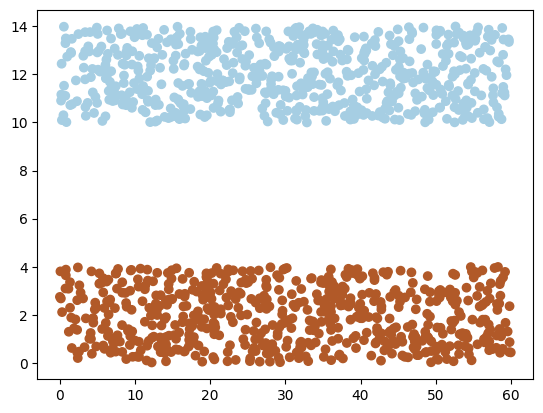

In [3]:
import matplotlib.pyplot as plt

# Plot sample distribution
scatter = plt.scatter(x=X[:, 0], y=X[:, 1], c=Y, cmap=plt.cm.Paired) # type: ignore
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate SVM classifier
C = 1e6
model = SVC(kernel="linear", C=C)

# Fit classifier
model.fit(X=X, y=Y)

# Compute accuracy (on the training set --> useless, just to show how to compute it)
Y_pred = model.predict(X=X)
acc = accuracy_score(y_true=Y, y_pred=Y_pred)
print(f"Accuracy on training set: {acc}")

Accuracy on training set: 1.0


/workspaces/notebooks/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


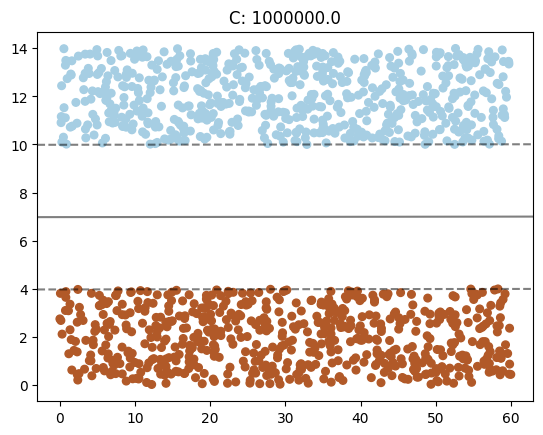

In [5]:
plotHyperplane(X, Y, model, f'C: {C}')

This dataset is linearly separable, but even if we can find a separating hyperplane, this does not mean it is always the best.
Let's add only one noise point

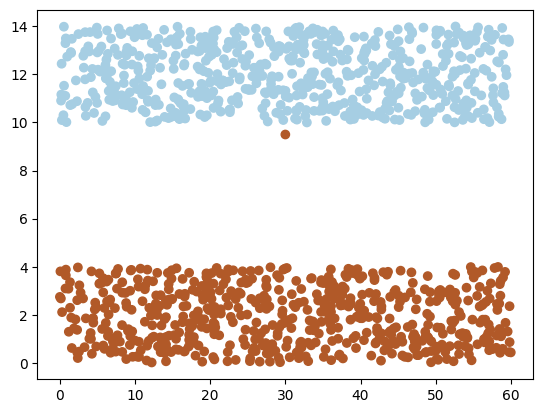

In [6]:
# Add one noisy point to previous dataset
X_noisy = np.concatenate([X, np.array([[30, 9.5]])], axis=0)
Y_noisy = np.concatenate([Y, np.array([[1.0]])], axis=0)

# Plot sample distribution
scatter = plt.scatter(x=X_noisy[:, 0], y=X_noisy[:, 1], c=Y_noisy, cmap=plt.cm.Paired) # type: ignore
plt.show()

In [9]:
# Instantiate SVM classifier
C = 1e-2
model = SVC(kernel="linear", C=C)

# Fit classifier
model.fit(X=X_noisy, y=Y_noisy)

# Compute accuracy (on the training set --> useless, just to show how to compute it)
Y_pred = model.predict(X=X_noisy)
acc = accuracy_score(y_true=Y_noisy, y_pred=Y_pred)
print(f"Accuracy on training set: {acc}")

Accuracy on training set: 0.9991673605328892


/workspaces/notebooks/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


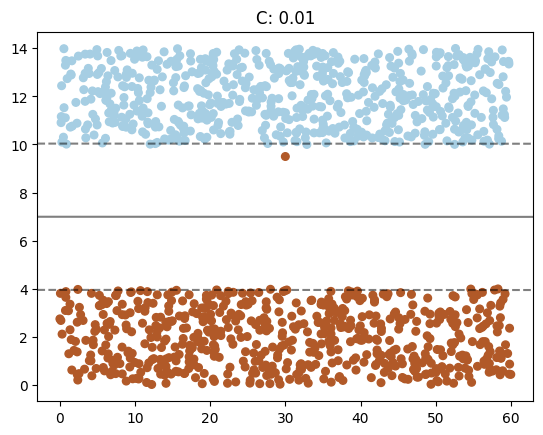

In [10]:
plotHyperplane(X_noisy, Y_noisy, model, f'C: {C}')

## Example 2: Linearly Non-Separable Dataset

In [11]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv(filepath_or_buffer="svm_2d_data.csv", header=None, delimiter=',')
X = data.to_numpy()[:, :-1]
Y = data.to_numpy()[:, -1]

# Show some stats
print(f"Number of samples: {X.shape[0]}")
print(f"Samples distribution: {np.unique(ar=Y, return_counts=True)}")

Number of samples: 200
Samples distribution: (array([-1.,  1.]), array([162,  38]))


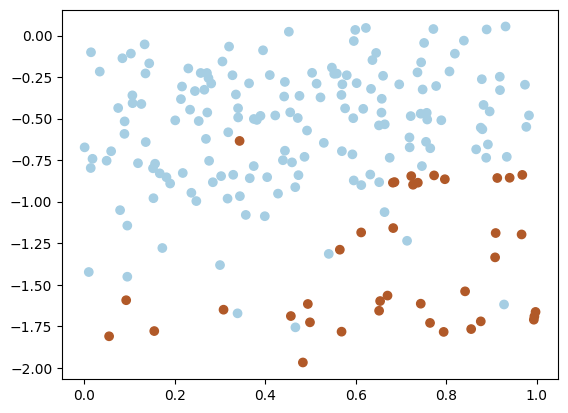

In [12]:
# Plot sample distribution
scatter = plt.scatter(x=X[:, 0], y=X[:, 1], c=Y, cmap=plt.cm.Paired) # type: ignore
plt.show()

In [13]:
# Instantiate SVM classifier
model = SVC(kernel="linear", C=1.0)

# Fit classifier
model.fit(X=X, y=Y)

# Compute accuracy (on the training set --> useless, just to show how to compute it)
Y_pred = model.predict(X=X)
acc = accuracy_score(y_true=Y, y_pred=Y_pred)
print(f"Accuracy on training set: {acc}")


Accuracy on training set: 0.91


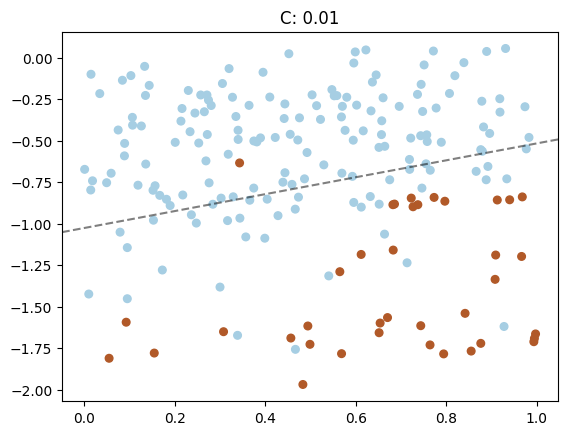

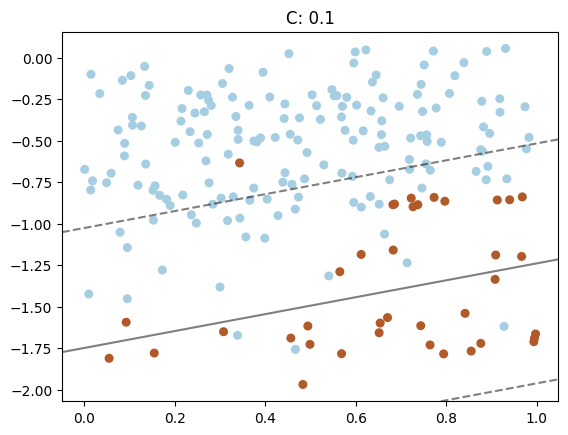

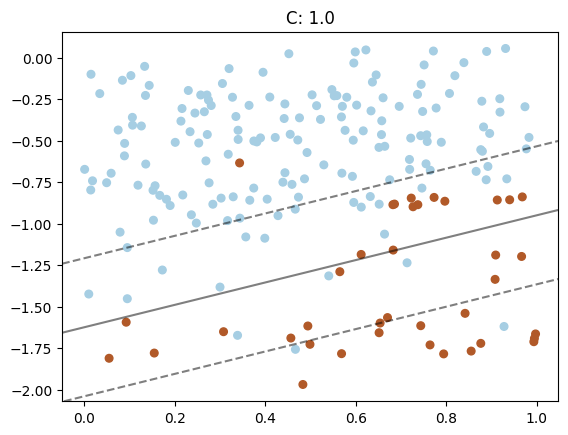

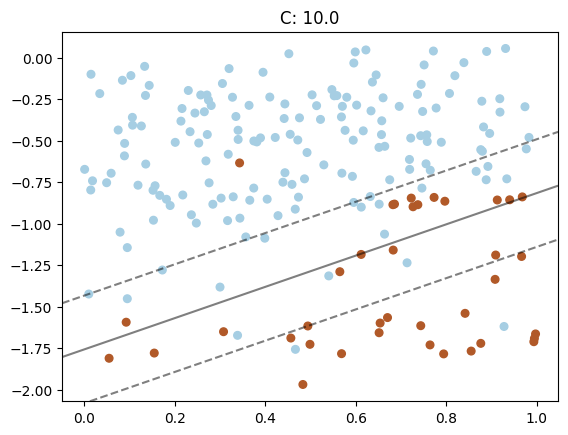

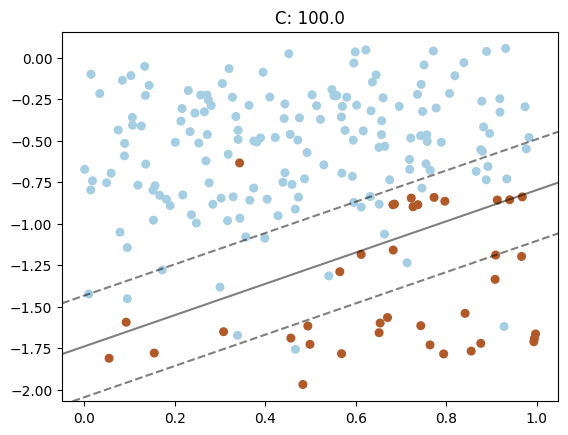

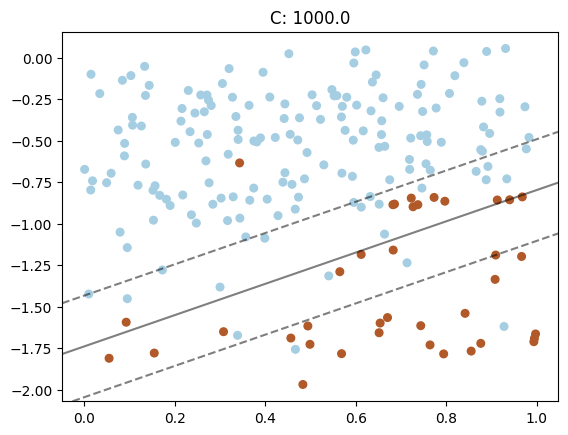

In [14]:
for C in np.logspace(-2,3,6):
  model = SVC(C=C, kernel='linear')
  model.fit(X=X, y=Y)
  plotHyperplane(X, Y, model, f'C: {C}')

## Example 3: Breast Cancer Dataset

We will start by importing a standard classification dataset:

In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import *

In [16]:
data = load_breast_cancer()
X = data['data'] # type: ignore
Y = data['target'] # type: ignore

print(f'Num samples {X.shape[0]}, num features {X.shape[1]}, num classes {len(np.unique(Y))}')
print(f'Balancing {np.unique(Y,return_counts=True)[1]/X.shape[0]}')

df = pd.DataFrame(X)
df.describe()

Num samples 569, num features 30, num classes 2
Balancing [0.37258348 0.62741652]


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=123, stratify=Y)

print(f'Number of samples in the training set {X_tr.shape[0]}')
print(f'Number of samples in the test set {X_ts.shape[0]}')

print(f'Balancing train {np.unique(Y_tr,return_counts=True)[1]/X_tr.shape[0]}')
print(f'Balancing test {np.unique(Y_ts,return_counts=True)[1]/X_ts.shape[0]}')

Number of samples in the training set 455
Number of samples in the test set 114
Balancing train [0.37362637 0.62637363]
Balancing test [0.36842105 0.63157895]


### Data Standardization
As a good practice, we __always__ have to scale/normalize data before applying any algorithm. It is mandatory when data varies on different scales but it is always a wise choice. The main reason is that usually algorithms are not _scale-invariant_ and so features with different scales have different effects on the updating rule (e.g. thinks about gradient descent update)!<br>


Let's remember how to scale/standardize data:

For each feature $x_i$
$$Standardization: \frac{x_i-\mu_i}{\sigma_i} \qquad Scaling: \frac{x_i-m_i}{M_i-m_i}$$
where:
$$M_i=max(x_i) \qquad m_i=Min(x_i)$$


To scale/standardize data we can rely on the packages [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) of Sklearn.<br>

__Important issue:__ when scaling/standardizing data we need to fit the values ($\mu_i,\sigma_i\dots$) on the training set and then applying the same transformation on the test set for two main reasons:
- we don't have the test set during the training phase, so we cannot evaluate $\mu_i,\sigma_i\dots$ with the test data
- computing $\mu_i,\sigma_i...$ using also the test set would be like insert information of the test set on the training set. __It's like cheating!__

In [18]:
scaler = StandardScaler()

X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

Be careful with the difference between fit_transform and trasform:
- fit_transform computes $\mu$s and $\sigma$s and applies the transformation to the train set
- transform standardize the data using the $\mu$s and $\sigma$s computed on the training set by the function fit_transform

In [19]:
def train_evaluate(model, X_tr, Y_tr, X_ts, Y_ts):
  model.fit(X_tr, Y_tr)

  print(f'Train accuracy {accuracy_score(Y_tr, model.predict(X_tr))}, precision {precision_score(Y_tr, model.predict(X_tr))}, recall {recall_score(Y_tr, model.predict(X_tr))}')
  print(f'Test accuracy {accuracy_score(Y_ts, model.predict(X_ts))}, precision {precision_score(Y_ts, model.predict(X_ts))}, recall {recall_score(Y_ts, model.predict(X_ts))}')
  return model

model = SVC(kernel='rbf', C=1.0)

train_evaluate(model, X_tr, Y_tr, X_ts, Y_ts)

Train accuracy 0.9868131868131869, precision 0.979381443298969, recall 1.0
Test accuracy 0.9912280701754386, precision 0.9863013698630136, recall 1.0


SVC()

# K-Fold Cross validation
To train Machine Learning models, we have to choose their hyperparameters. For Support Vector Machine, for example, the hyperparameters are C and the hyperparameters of the kernel function, if any.

The standard option for choosing the best value for the hyperparameters is to implement a $k$-fold crossvalidation:
* We choose, for each hyperparameter, a list of values we want to try;
* The term grid search refers to the process in which we analyze each possible combination of values of all hyperparameters and choose the best one;
* Each combination is tested by using a $k$-fold crossvalidation;
* The combination associated with the higher crossvalidation score is returned in output.

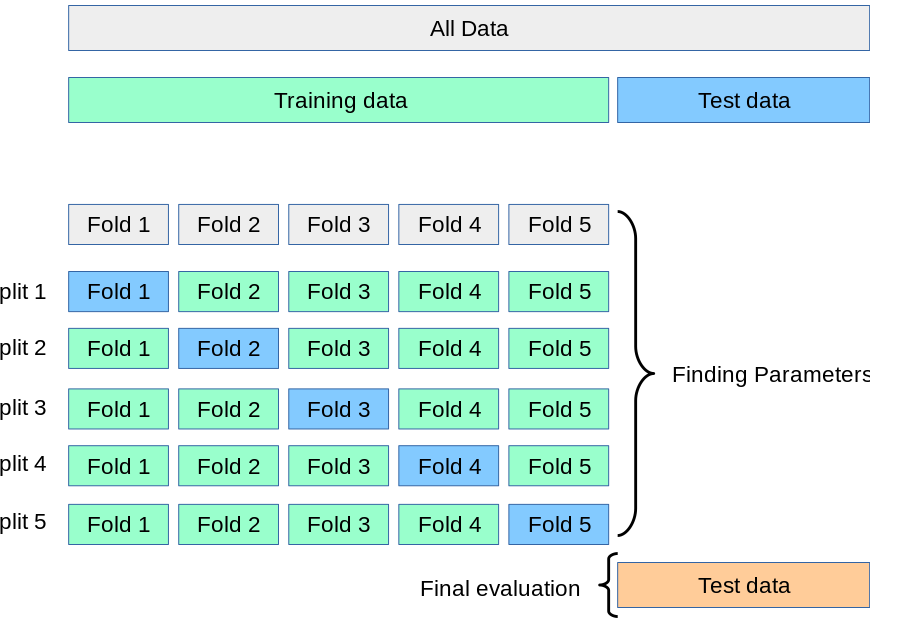

In [20]:

model = GridSearchCV(
    estimator=SVC(kernel='poly'), 
    param_grid={'degree':[2,3,4], 'C':[1.e-1, 1]}, 
    cv=5,
    scoring='accuracy'
)
model = train_evaluate(model, X_tr, Y_tr, X_ts, Y_ts)
print()

# Best model
print(f"best estimator: {model.best_estimator_}")
print()

# Best parameters
print(f"best hyperparameters: {model.best_params_}")
print()

# Useful info
#pprint(object=model.cv_results_)
config=model.cv_results_["params"]
print(f"config: {config}")
print()

val_scores = model.cv_results_["mean_test_score"]
print(f"val scores: {val_scores}")


Train accuracy 0.9098901098901099, precision 0.8742331288343558, recall 1.0
Test accuracy 0.9122807017543859, precision 0.8780487804878049, recall 1.0

best estimator: SVC(C=1, kernel='poly')

best hyperparameters: {'C': 1, 'degree': 3}

config: [{'C': 0.1, 'degree': 2}, {'C': 0.1, 'degree': 3}, {'C': 0.1, 'degree': 4}, {'C': 1, 'degree': 2}, {'C': 1, 'degree': 3}, {'C': 1, 'degree': 4}]

val scores: [0.71868132 0.82637363 0.73406593 0.8        0.89230769 0.79120879]
